Note: to run this notebook, you will need to put the test_Rj9YEaI.csv file inside the train_HNzkrPW (1) folder and then zip it before uploading it.

#Shared

Facial image data source:
https://www.analyticsvidhya.com/datahack/contest/vista-codefest-computer-vision-1/

#I.J. and Gary

extract zip file to "train_data" folder

In [ ]:
# unzip folder

import zipfile
import os

zip_path = "/content/train_HNzkrPW (1).zip"  # Change this to your uploaded zip file
extract_path = "/content/train"  # Change as needed

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: /content/train


#Cleaning the Data

In [ ]:
# Imports
import os
import shutil
import pandas as pd

# Paths
TRAIN_CSV_PATH = "train/train.csv"
TEST_CSV_PATH = "train/test_Rj9YEaI.csv"
IMAGE_DATA_PATH = "train/image_data/"
TEST_IMAGE_DATA_PATH = "train/test_image_data/"  # New folder for test images
BBOX_PATH = "train/bbox_train.csv"

# Create the test image directory if it doesn't exist
os.makedirs(TEST_IMAGE_DATA_PATH, exist_ok=True)

# Load CSVs
train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)



# Compute IQR
Q1 = train_df['HeadCount'].quantile(0.25)
Q3 = train_df['HeadCount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Filter out outliers
df_no_outliers = train_df[(train_df['HeadCount'] >= lower_bound) & (train_df['HeadCount'] <= upper_bound)]

# Print result
print(f"Original dataset size: {train_df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

IQR: 2.0
Lower Bound: 0.0
Upper Bound: 8.0
Original dataset size: 5733
Dataset size after removing outliers: 5455


In [ ]:
# Get valid image filenames
valid_images = set(df_no_outliers.iloc[:, 0].tolist())
valid_test_images = set(test_df.iloc[:, 0].tolist())

# Iterate over image files
for image_file in os.listdir(IMAGE_DATA_PATH):
    image_path = os.path.join(IMAGE_DATA_PATH, image_file)

    if os.path.isfile(image_path):
        if image_file in valid_test_images:
            # Move test images to test_image_data
            shutil.move(image_path, os.path.join(TEST_IMAGE_DATA_PATH, image_file))
            print(f"Moved to test_image_data: {image_file}")
        elif image_file not in valid_images:
            # Remove unrelated images
            os.remove(image_path)
            print(f"Removed: {image_file}")

print("Cleanup complete! Test images moved and unrelated images removed.")

Moved to test_image_data: 17089.jpg
Moved to test_image_data: 17944.jpg
Moved to test_image_data: 15328.jpg
Moved to test_image_data: 11903.jpg
Moved to test_image_data: 17267.jpg
Moved to test_image_data: 10639.jpg
Moved to test_image_data: 14475.jpg
Moved to test_image_data: 12553.jpg
Moved to test_image_data: 11969.jpg
Moved to test_image_data: 18162.jpg
Moved to test_image_data: 10782.jpg
Moved to test_image_data: 13901.jpg
Moved to test_image_data: 14274.jpg
Moved to test_image_data: 13809.jpg
Moved to test_image_data: 14993.jpg
Moved to test_image_data: 15791.jpg
Moved to test_image_data: 17713.jpg
Moved to test_image_data: 12016.jpg
Moved to test_image_data: 12626.jpg
Moved to test_image_data: 11590.jpg
Moved to test_image_data: 17839.jpg
Moved to test_image_data: 10723.jpg
Moved to test_image_data: 16015.jpg
Moved to test_image_data: 10251.jpg
Removed: 10054.jpg
Moved to test_image_data: 10340.jpg
Moved to test_image_data: 13595.jpg
Moved to test_image_data: 14506.jpg
Moved to 

#Exploratory Data Analysis

Dataset Shape: (5455, 2)

Column Data Types:
Name         object
HeadCount     int64
dtype: object

Missing Values:
Name         0
HeadCount    0
dtype: int64

Descriptive Statistics:
             Name    HeadCount
count        5455  5455.000000
unique       5455          NaN
top     18207.jpg          NaN
freq            1          NaN
mean          NaN     3.879377
std           NaN     1.558576
min           NaN     1.000000
25%           NaN     3.000000
50%           NaN     4.000000
75%           NaN     5.000000
max           NaN     8.000000

First 5 Rows:


Name  HeadCount
0  10001.jpg          4
1  10002.jpg          4
2  10003.jpg          2
3  10004.jpg          3
4  10006.jpg          4


Value counts for Name:
Name
18207.jpg    1
10001.jpg    1
10002.jpg    1
10003.jpg    1
10004.jpg    1
            ..
10026.jpg    1
10027.jpg    1
10028.jpg    1
10031.jpg    1
10032.jpg    1
Name: count, Length: 5455, dtype: int64


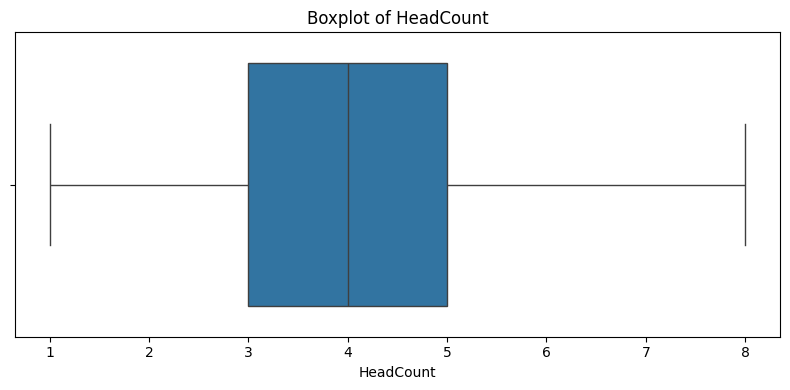

In [ ]:
# Step 1: Install and import libraries
!pip install -q seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Google Colab: mount drive if needed
# from google.colab import drive
# drive.mount('/content/drive')

# Step 2: Load the dataset
# Use your actual path or upload the file directly in Colab
# df = pd.read_csv('train/train.csv')
df = df_no_outliers

# Step 3: Basic information
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Step 4: Preview the data
print("\nFirst 5 Rows:")
display(df.head())

# Step 5: Value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

# Step 6: Visualizations

# Count plots for categorical features
# categorical_cols = df.select_dtypes(include='object').columns
# for col in categorical_cols:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(data=df, x=col, order=df[col].value_counts().index)
#     plt.title(f"Count Plot of {col}")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Histograms for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
# df[numerical_cols].hist(bins=30, figsize=(12, 10), layout=(len(numerical_cols) // 3 + 1, 3))
# plt.tight_layout()
# plt.show()

# Boxplots to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


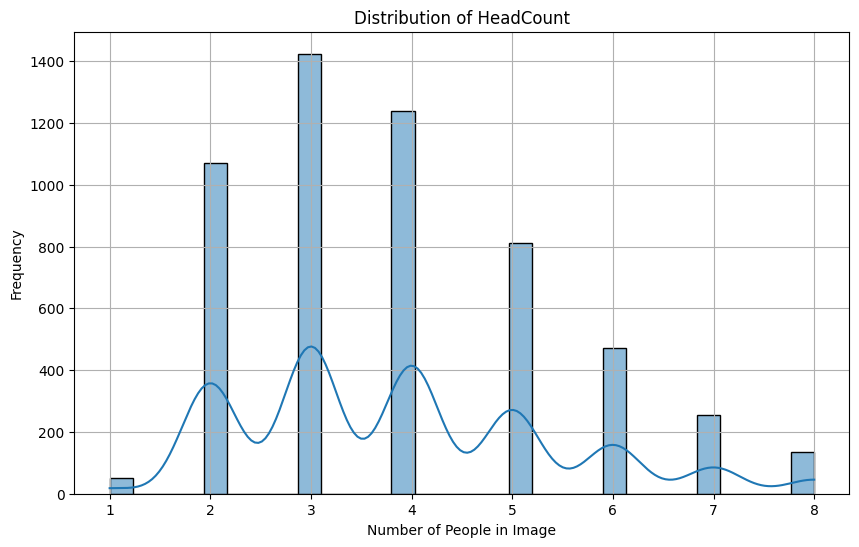

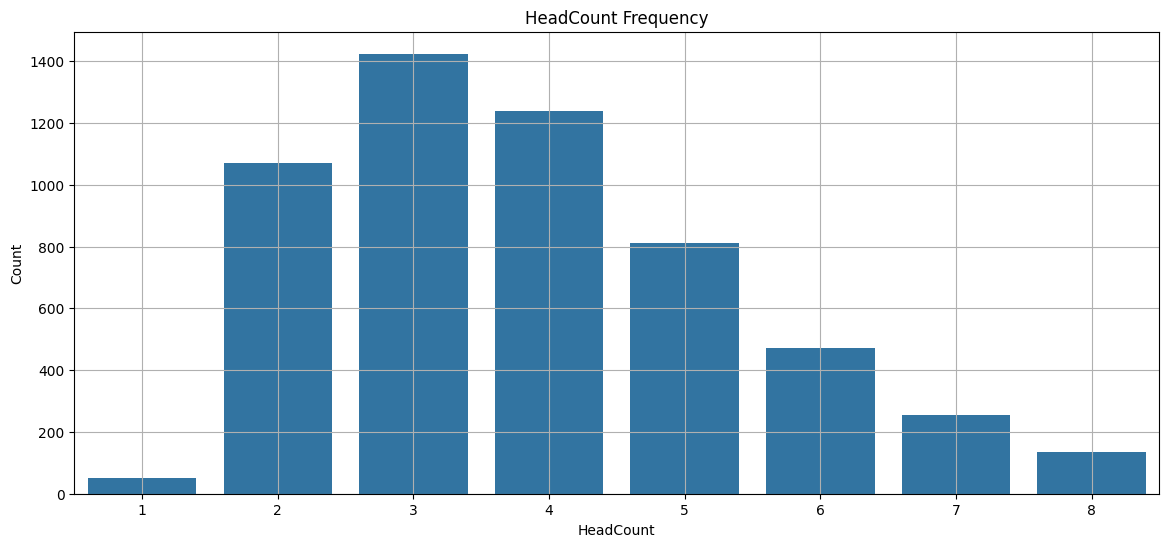


Top 10 Most Frequent HeadCounts:
HeadCount
3    1424
4    1238
2    1069
5     810
6     472
7     254
8     136
1      52
Name: count, dtype: int64


In [ ]:
# Distribution plot of HeadCount
plt.figure(figsize=(10, 6))
sns.histplot(df['HeadCount'], bins=30, kde=True)
plt.title("Distribution of HeadCount")
plt.xlabel("Number of People in Image")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Count plot (can be better for small integers like head counts)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='HeadCount', order=sorted(df['HeadCount'].unique()))
plt.title("HeadCount Frequency")
plt.xlabel("HeadCount")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Print most common HeadCount values
print("\nTop 10 Most Frequent HeadCounts:")
print(df['HeadCount'].value_counts().head(10))


# Now the Actual Model

In [ ]:
!pip install deepface opencv-python matplotlib
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from skimage import io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ce8eca61ac91f39264b6ba45d2103d4f175e406632cb063ece45a58e7d118c3f
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
25-04-10 19:27:16 - Directory /root/.deepface has been created
25-04-10 19:27:16 - Directory /root/.deepface/weights has been created


  0%|          | 0/10 [00:00<?, ?it/s]

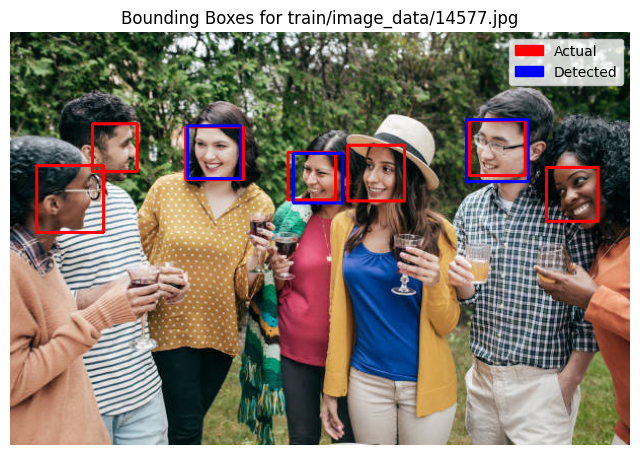

Actual: 7
Detected: 3




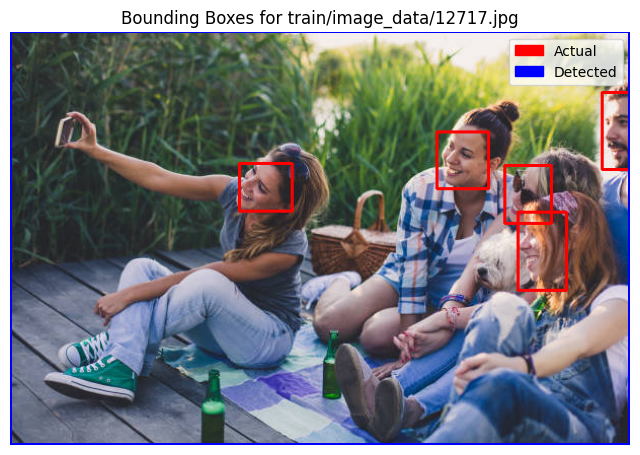

Actual: 5
Detected: 1




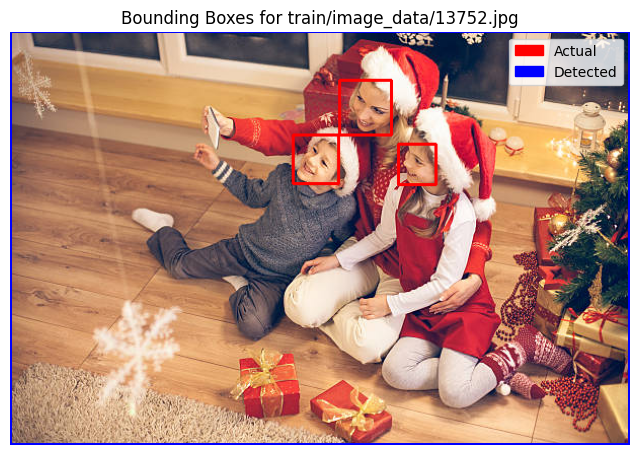

Actual: 3
Detected: 1




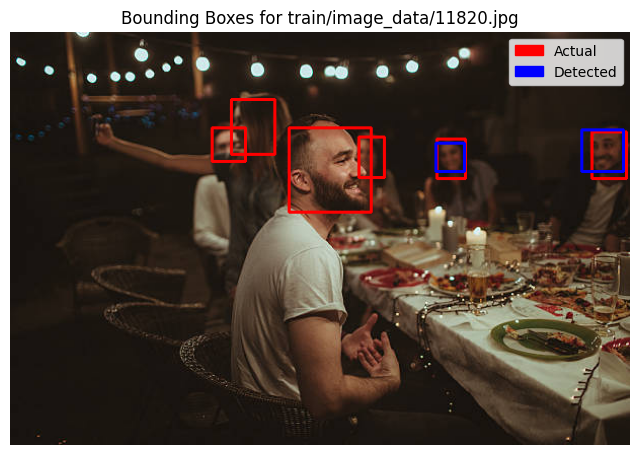

Actual: 6
Detected: 2




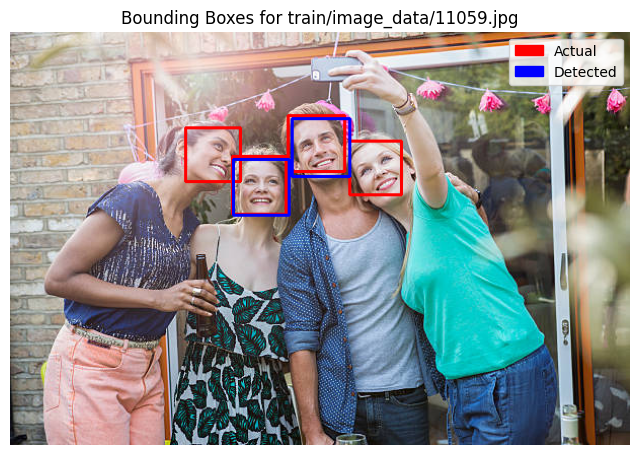

Actual: 4
Detected: 2




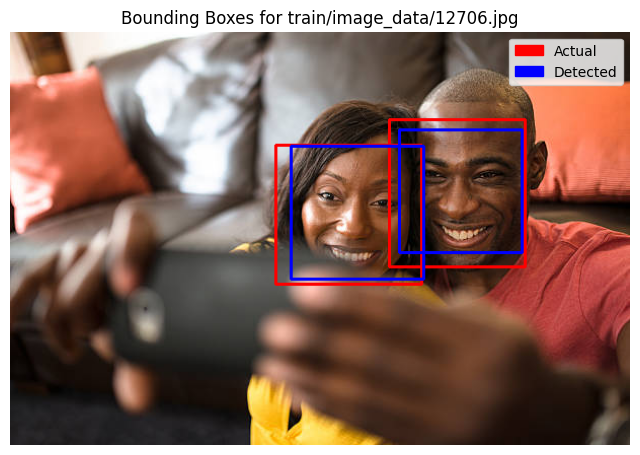

Actual: 2
Detected: 2




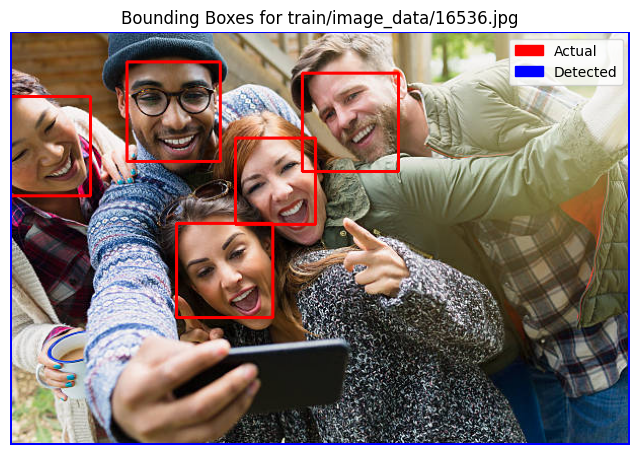

Actual: 5
Detected: 1




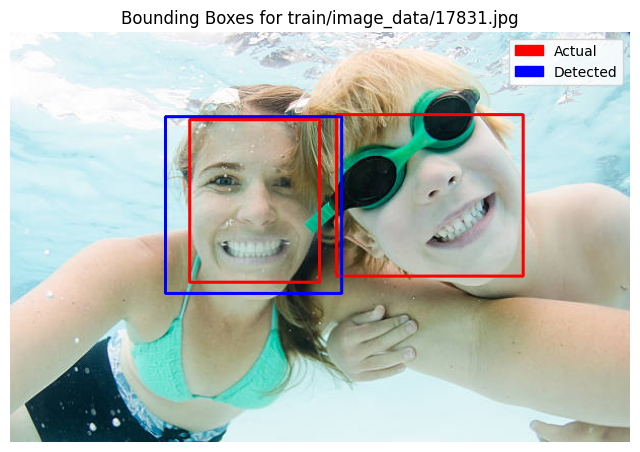

Actual: 2
Detected: 1




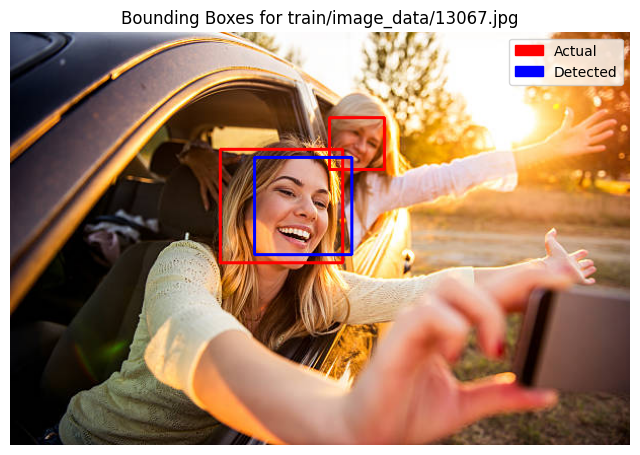

Actual: 2
Detected: 1




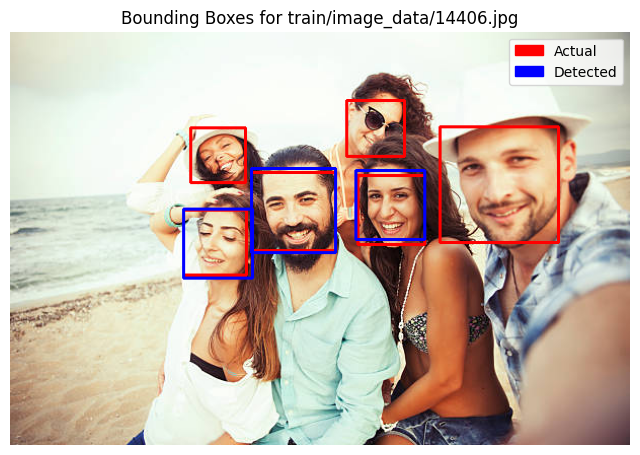

Actual: 6
Detected: 3


Avg off: 2.5


In [ ]:
# Testing Code block
import random
#!pip install tqdm
from tqdm import tqdm_notebook
import os
import matplotlib.patches as mpatches

IMAGE_DATA_PATH = "train/image_data/"

def average_list(list1):
    if not list1:
        return 0
    return sum(list1) / len(list1)

def display_image_with_boxes(image_path, extra_boxes=[]):
    bbox_df = pd.read_csv(BBOX_PATH)
    image = cv2.imread(image_path)


    if image is None:
        print(f"Error: Image not found.")
    else:
        # Convert BGR to RGB (Matplotlib expects RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get bounding boxes for this image
        img_annotations = bbox_df[bbox_df['Name'] == image_path.replace('train/image_data/', '')]

        # Draw bounding boxes from CSV (red)
        for _, row in img_annotations.iterrows():
            xmin, ymin, xmax, ymax = row[['xmin', 'ymin', 'xmax', 'ymax']]
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

        # Draw extra boxes (blue)
        for face in extra_boxes:
            x, y, w, h = face['x'], face['y'], face['w'], face['h']
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        red_patch = mpatches.Patch(color='red', label='Actual')
        blue_patch = mpatches.Patch(color='blue', label='Detected')

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Bounding Boxes for {image_path}")
        plt.legend(handles=[red_patch, blue_patch], loc='upper right')
        plt.show()


# Get a list of image files from directory path and shuffle them.
image_files = [f for f in os.listdir(IMAGE_DATA_PATH) if f.lower().endswith(('.jpg'))]

# Randomize the order
random.shuffle(image_files)

results = []

# Loop through shuffled random images selecting first 5 random.
for image_file in tqdm_notebook(image_files[:10]):

    # Construct full image path
    image_path = os.path.join(IMAGE_DATA_PATH, image_file)
    #image_file = '11635.jpg'
    #image_path = 'train/image_data/11635.jpg'

    # By default, OpenCV loads images in BGR format.
    img = cv2.imread(image_path)
    #img = cv2.imread("train/image_data/16801.jpg")

    # Converts the image from BGR to RGB for correct visualization
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Analyze the image, DeepFace detects faces in the image
    #print(DeepFace.extract_faces(img_path=image_path, enforce_detection=False))
    detected_faces = DeepFace.extract_faces(img_path=image_path, enforce_detection=False)
    #print(detected_faces[0]['facial_area'])
    act_heads = df[df['Name'] == image_file]['HeadCount'].values[0]

    results.append(abs(act_heads - len(detected_faces)))

    display_image_with_boxes(image_path, [obj['facial_area'] for obj in detected_faces])
    print('Actual:', act_heads)
    print('Detected:', len(detected_faces))
    print('\n')
    # Display results
    #plt.imshow(rgb_img)
    #plt.axis("off")
    #plt.title(f"Detected Faces: {len(detected_faces)}")
    #plt.show()

    #print(f"Number of faces detected: {len(detected_faces)}")
    #print(f"File name: {image_file}\n\n")

print("Avg off:", average_list(results))

#Print the Metrics of the DeepFace Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = []
y_pred = []

# Gather predictions and actuals again from your results loop
for image_file in image_files[:10]:
    image_path = os.path.join(IMAGE_DATA_PATH, image_file)
    act_heads = df[df['Name'] == image_file]['HeadCount'].values[0]

    # DeepFace face detection
    detected_faces = DeepFace.extract_faces(img_path=image_path, enforce_detection=False)
    pred_count = len(detected_faces)

    y_true.append(act_heads)
    y_pred.append(pred_count)

# Compute metrics
# rmse = mean_squared_error(y_true, y_pred, squared=False)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
accuracy = np.mean([a == b for a, b in zip(y_true, y_pred)]) * 100

print("\n--- Model Evaluation Metrics ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Accuracy (Exact Match): {accuracy:.2f}%")



--- Model Evaluation Metrics ---
RMSE: 2.88
MAE: 2.50
Accuracy (Exact Match): 10.00%


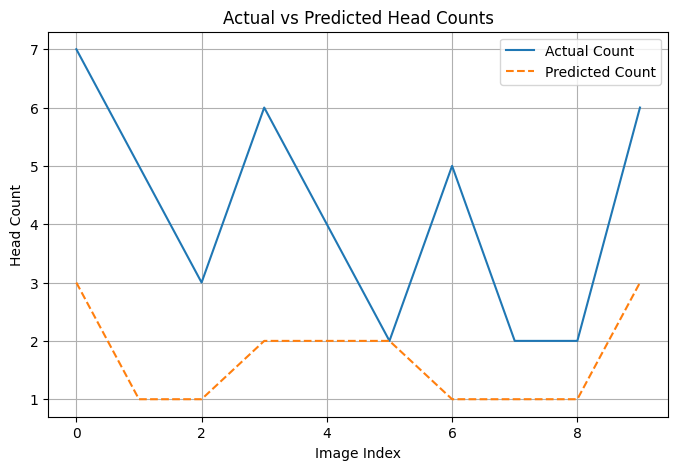

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_true, label='Actual Count')
plt.plot(y_pred, label='Predicted Count', linestyle='--')
plt.title('Actual vs Predicted Head Counts')
plt.xlabel('Image Index')
plt.ylabel('Head Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Now we want to graph the entire dataset (just for extra visualization)

y_true = []
y_pred = []
filenames = []

for image_file in image_files:  # <- Use the whole list
    image_path = os.path.join(IMAGE_DATA_PATH, image_file)
    act_heads = df[df['Name'] == image_file]['HeadCount'].values[0]

    try:
        detected_faces = DeepFace.extract_faces(img_path=image_path, enforce_detection=False)
        pred_count = len(detected_faces)
    except Exception as e:
        print(f"Skipping {image_file}: {e}")
        continue

    y_true.append(act_heads)
    y_pred.append(pred_count)
    filenames.append(image_file)

# --- Plotting ---
plt.figure(figsize=(14, 6))
plt.plot(y_true, label='Actual Count')
plt.plot(y_pred, label='Predicted Count', linestyle='--')
plt.title('Actual vs Predicted Head Counts (All Images)')
plt.xlabel('Image Index')
plt.ylabel('Head Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Show per image accuracy

In [ ]:
per_image_accuracies = []

for true, pred in zip(y_true, y_pred):
    if true == 0 and pred == 0:
        per_image_accuracies.append(1.0)  # Perfect match
    elif true == 0 or pred == 0:
        per_image_accuracies.append(0.0)  # Completely missed
    else:
        acc = min(true, pred) / max(true, pred)
        per_image_accuracies.append(acc)

overall_average_accuracy = np.mean(per_image_accuracies) * 100
print(f"Per-image average accuracy: {overall_average_accuracy:.2f}%")


Per-image average accuracy: 53.16%


In [ ]:
display_image_with_boxes('train/image_data/11635.jpg')

#We've started the process of fine tuning the model. Hopefully we can get higher accuracy out of it without overfitting.

In [ ]:
# #FIT MODEL ATTEMPT
# import os
# import cv2
# import numpy as np
# import pandas as pd
# from deepface import DeepFace
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import img_to_array

# # Define paths
# TRAIN_CSV_PATH = "train/train.csv"
# TEST_CSV_PATH = "train/test_Rj9YEaI.csv"
# IMAGE_DATA_PATH = "train/image_data/"
# TEST_IMAGE_DATA_PATH = "train/test_image_data/"  # New folder for test images
# BBOX_PATH = "train/bbox_train.csv"

# # Load CSV files
# bbox_df = pd.read_csv(BBOX_PATH)  # Bounding box data
# # train_df = pd.read_csv(TRAIN_CSV_PATH)  # Train.csv with headcount
# train_df = df_no_outliers # Train.csv with headcount

# # Function to load images and labels
# def load_data(image_path, bbox_df, train_df):
#     images = []
#     labels = []

#     # Merge bbox data with headcount data from train.csv
#     merged_df = bbox_df.merge(train_df[['Name', 'HeadCount']], on='Name', how='left')

#     for index, row in merged_df.iterrows():
#         img_path = os.path.join(image_path, row['Name'])  # Full image path
#         img = cv2.imread(img_path)

#         if img is not None:
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             img = cv2.resize(img, (224, 224))  # Resize to match model input
#             images.append(img_to_array(img))
#             labels.append(row['HeadCount'])  # Assign headcount from train.csv

#     return np.array(images), np.array(labels)

# # Load dataset with merged headcount
# X, y = load_data(IMAGE_DATA_PATH, bbox_df, train_df)

# # Normalize images
# X = X / 255.0

# # Split dataset into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train DeepFace Model
# model = DeepFace.build_model("VGG-Face")  # Choose model architecture
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train model
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# # Save the trained model
# model.save("deepface_custom_model.h5")

# print("Model Training Completed and Saved!")



In [ ]:
# #FIT MODEL ATTEMPT 2
# import os
# import cv2
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Define paths
# TRAIN_CSV_PATH = "train/train.csv"
# IMAGE_DATA_PATH = "train/image_data/"
# BBOX_PATH = "train/bbox_train.csv"




# # Load dataset
# X, y = load_data(IMAGE_DATA_PATH, bbox_df)

# # Normalize images
# X = X / 255.0  # Normalize pixel values to [0,1]

# # Split dataset into training and validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define CNN Model for Headcount Estimation
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='linear')  # Regression output
# ])

# # Compile Model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train Model
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# # Save the trained model
# model.save("headcount_estimation_model.h5")

# print("Model Training Completed and Saved!")
